This machine learning project is created for the capstone project of Machine Learning Zoomcamp by Alexey Grigoriev.  
We use Breast Cancer Wisconsin (Diagnostic) Data Set that you can download from [here.](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [1]:
#import all necessary modules
import pandas as pd
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset
breast_cancer = pd.read_csv('breast cancer wisconsin dataset.csv')

# 1. Exploratory Data Analysis (EDA)

In [4]:
#checking the shape of the dataset
breast_cancer.shape

(569, 33)

We have 569 rows and 33 columns. However, according to the documentation on this [link,](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) it is said that the number of column is 32. We need to investigate more about it.

#checkint the first 5 rows but transposed as the number of column is a lot
breast_cancer.head().T

In [5]:
#checking how many missing values in the dataset
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As the last column of 'Unnamed: 32' all have missing values, it is save to remove this column.  
We also don't have any missing values in other columns, so we don't need to do anything.

In [6]:
breast_cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
#checking the column names
print(breast_cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
#confirming that the dataset has 32 columns
breast_cancer.shape

(569, 32)

In [9]:
#quick check of the descriptive statistics of the dataset
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The above table shows only 31 column instead of 32 because the descriptive statistics is only for numerical feature.  
It shows the minimum, maximum value of each column plus other important values for quick check.

In [10]:
#checking the unique values of each column of the dataset
breast_cancer.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Our target variable in this case is 'diagnosis' column.  
It has 2 values: M = malignant (cancerous, invasive, can spread), B = benign (noncancerous, slow-growing, doesn't spread).  
Now check the number of B and M then visualize those values.

In [11]:
breast_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

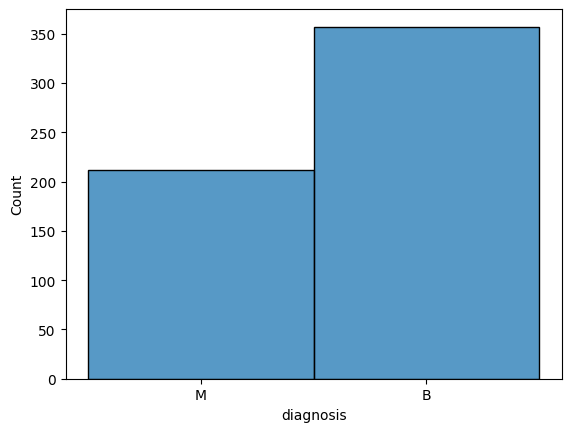

In [12]:
ax = sns.histplot(breast_cancer['diagnosis'])


The above diagram shows mild imbalance proportion between M and B.  
We'll then split data into train and test set using **stratified splitting.**  
Also, we'll evaluate model using F1-Score, Precision-Recall Curves, and/or AUC-ROC.  
### 1.2 Visualization  
We are observing the data further using violin plot visualization.  
We need to standardize the data before visualize it because each column has different range. We devide the features into 3 groups, each has 10 features for a better visualization.  
Standardization formula:  

Z = (X - μ) / σ   

where:  
Z is the standardized score,  
X is the original value,  
μ is the mean, and  
σ is the standard deviation of the dataset.  

In [13]:
breast_cancer_features = breast_cancer.drop(['diagnosis', 'id'], axis = 1)
breast_cancer_diag = breast_cancer['diagnosis']

#standardization of features
z_breast_cancer_feat = (breast_cancer_features - breast_cancer_features.mean()) / breast_cancer_features.std()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

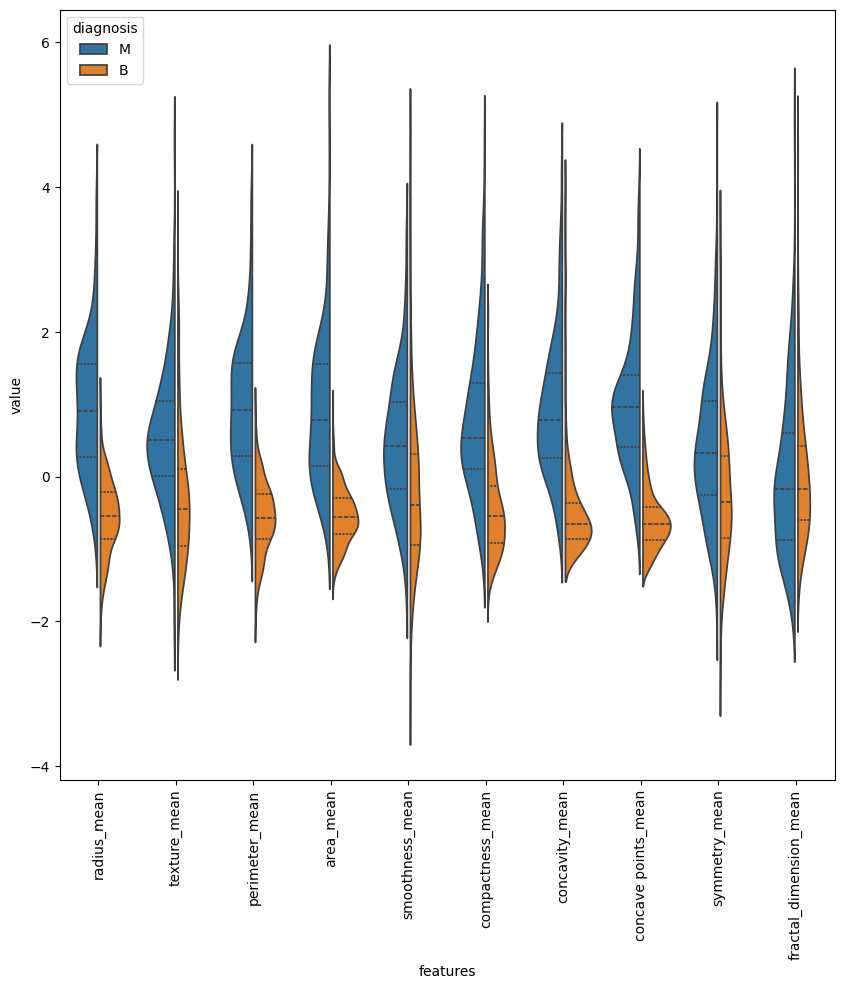

In [14]:
#visualize the first group
breast_cancer_features_1 = pd.concat([breast_cancer_diag, z_breast_cancer_feat.iloc[:,0:10]], 
                                     axis = 1) #combining target variable and features
breast_cancer_features_1 = pd.melt(breast_cancer_features_1, 
                                   id_vars = 'diagnosis', var_name = 'features', 
                                   value_name = 'value') #reshape a DataFrame from a wide format to a long (or "melted") format
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=breast_cancer_features_1, split=True, inner='quart', gap=0.1)
plt.xticks(rotation=90)

In texture_mean, _Malignant_ and _Beinign_ median seems separated that means a good feature for classification.  
On the other hand, fractar_dimension_mean has same median of _Malignant_ and _Beinign_ that couldn't give good indication of classification.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

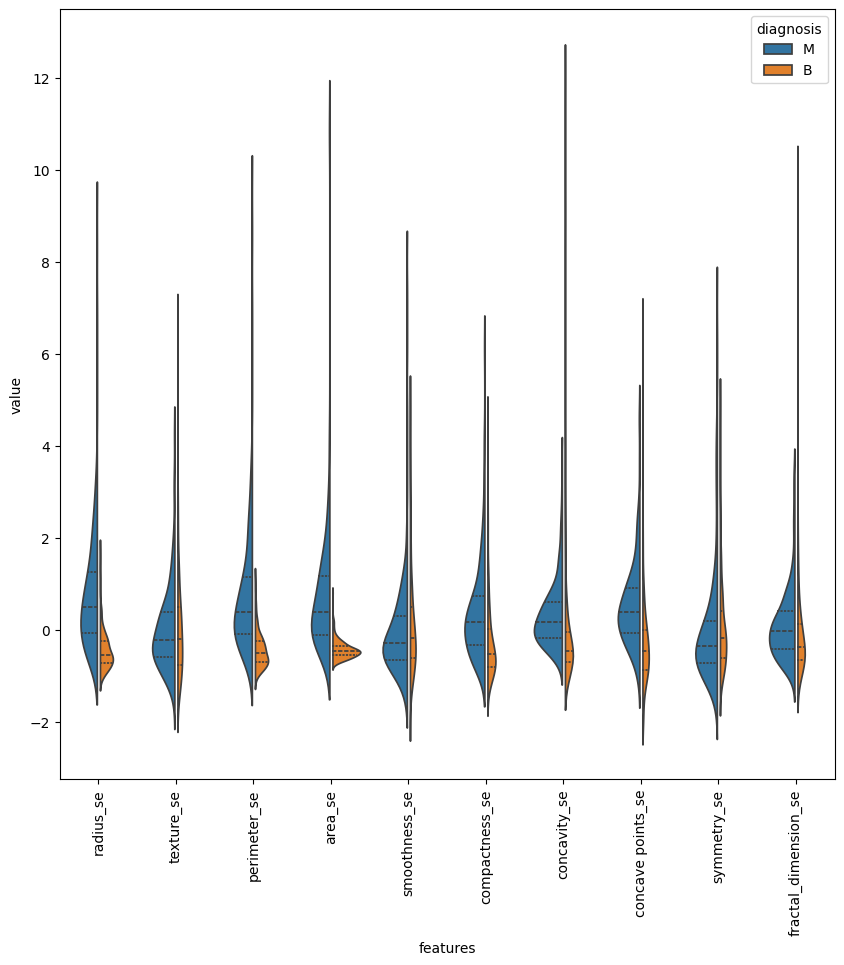

In [15]:
#visualize the second group
breast_cancer_features_2 = pd.concat([breast_cancer_diag, z_breast_cancer_feat.iloc[:,10:20]], 
                                     axis = 1) #combining target variable and features
breast_cancer_features_2 = pd.melt(breast_cancer_features_2, 
                                   id_vars = 'diagnosis', var_name = 'features', 
                                   value_name = 'value') #reshape a DataFrame from a wide format to a long (or "melted") format
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=breast_cancer_features_2, split=True, inner='quart', gap=0.1)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

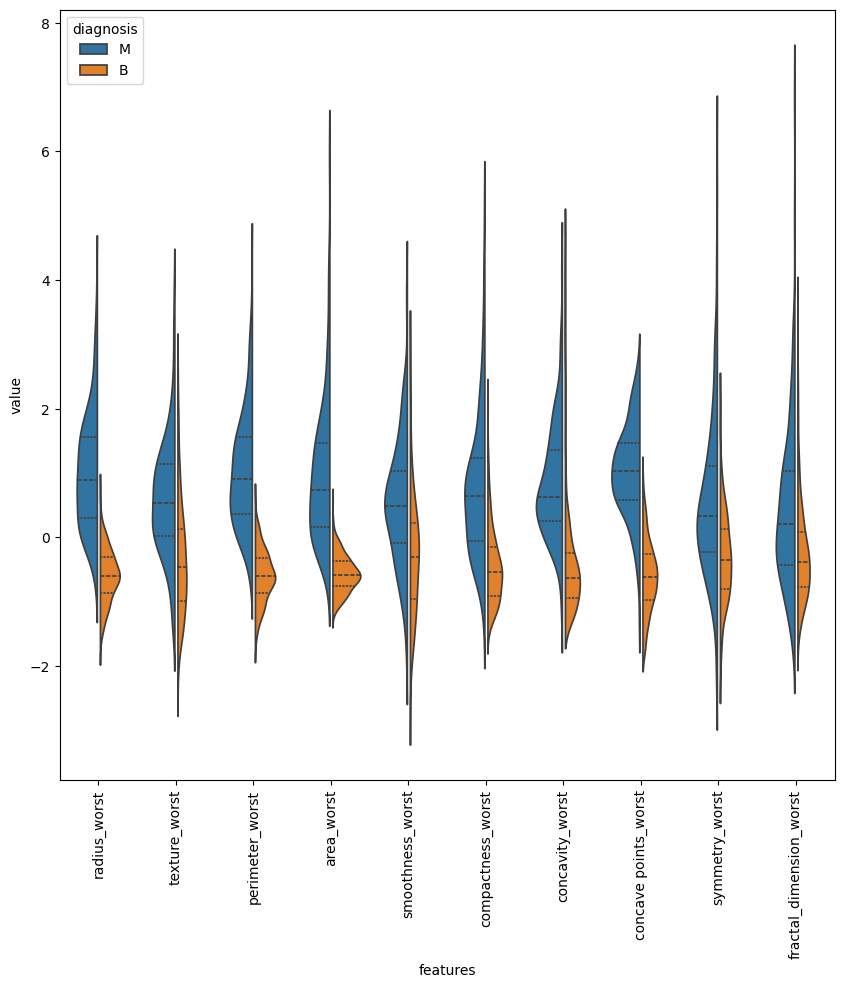

In [16]:
#visualize the third group
breast_cancer_features_3 = pd.concat([breast_cancer_diag, z_breast_cancer_feat.iloc[:,20:30]], 
                                     axis = 1) #combining target variable and features
breast_cancer_features_3 = pd.melt(breast_cancer_features_3, 
                                   id_vars = 'diagnosis', var_name = 'features', 
                                   value_name = 'value') #reshape a DataFrame from a wide format to a long (or "melted") format
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=breast_cancer_features_3, split=True, inner='quart', gap=0.1)
plt.xticks(rotation=90)

Now let's take a look at correlation between features using heatmap.

<Axes: >

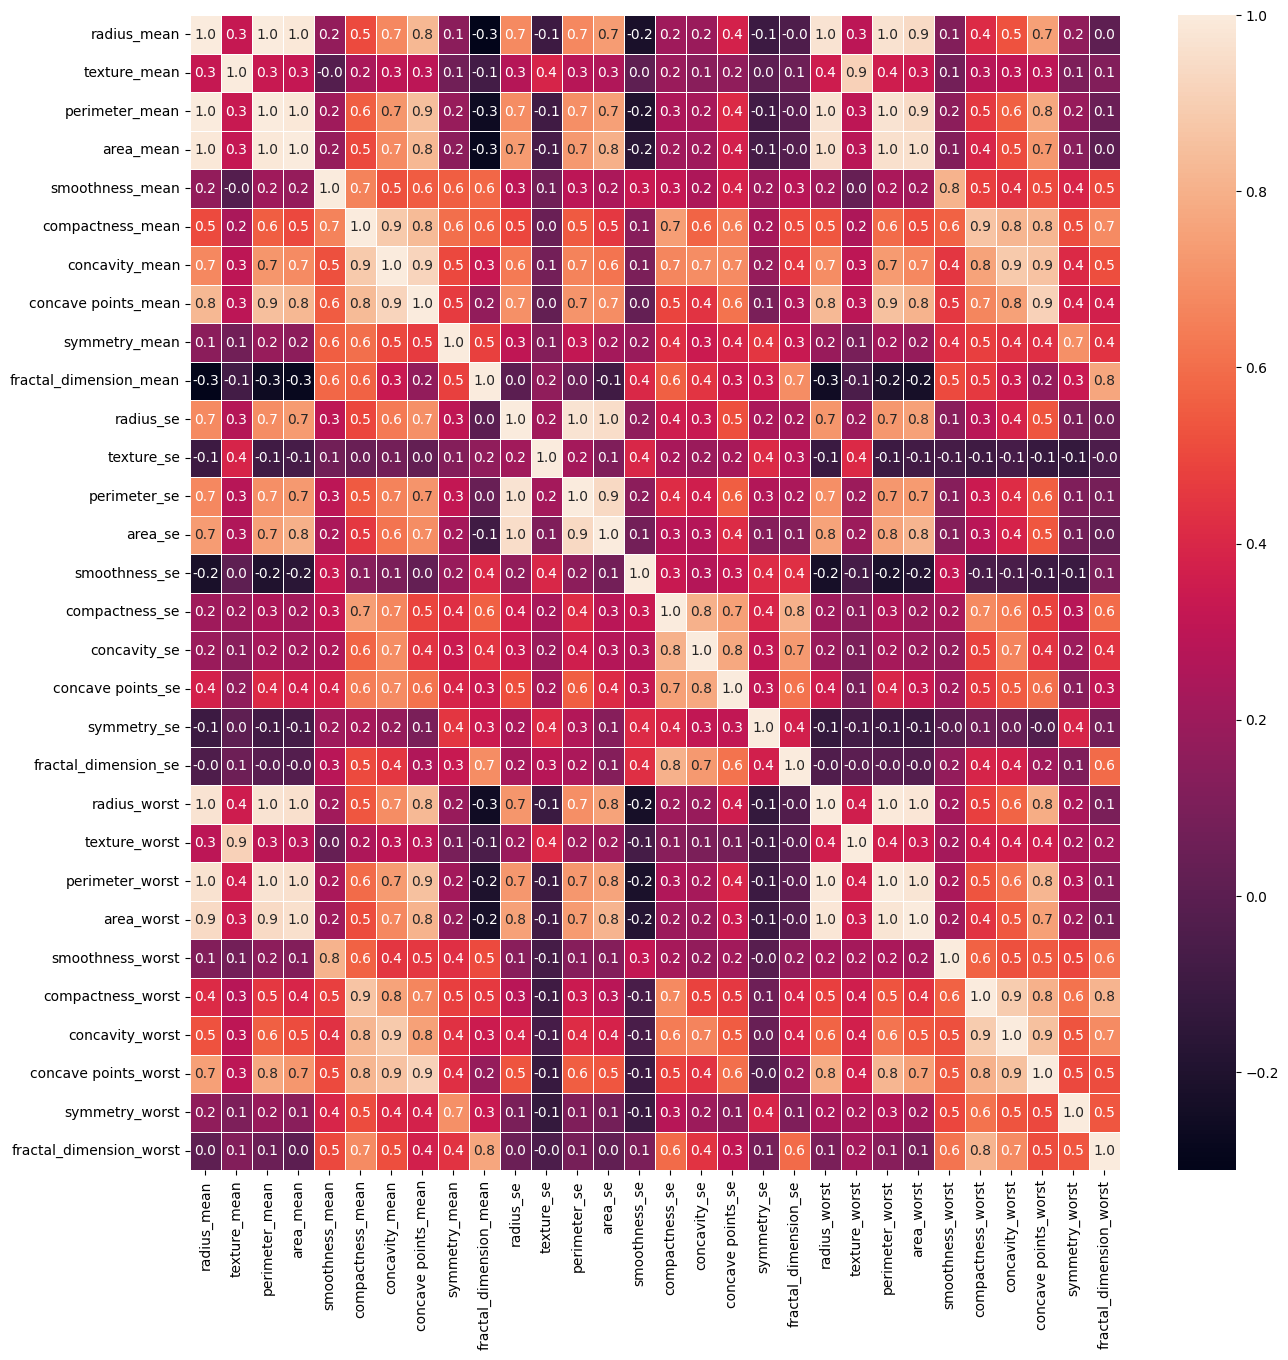

In [17]:
#correlation heatmap
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(breast_cancer_features.corr(), annot=True, linewidth=0.5, fmt = '.1f', ax=ax)

### 1.3 Feature Selection  
We can see on heatmap that some features correlated to each other shown by score of 1.0. For example the score of 'radius_mean' with 'perimeter_mean' and 'area_mean' are 1.0, so we'll only take one of them in our machine learning model which is 'area_mean'. We also pick features if they have score of 0.9 and 0.8. This can make our model simpler and faster to run.
We'll also pick features between:
1. compactness_mean, concavity_mean, and concave points_mean. (pick concavity_mean)
2. radius_se, perimeter_se, and area_se  (pick area_se)
3. radius_worst, perimeter_worst, and area_worst (pick area_worst)
4. compactness_worst, concavity_worst, and concave points_worst (pick concavity_worst)
5. compactness_se, concavity_se, and concave points_se (pick concavity_se)
6. texture_mean and texture_worst (pick texture_mean)
7. area_worst and area_mean (pick area_mean)

Now we'll create a new simplified dataframe .

In [18]:
drop_list = ['radius_mean', 'perimeter_mean',  'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
             'radius_worst', 'perimeter_worst',  'compactness_worst', 'concave points_worst',  'compactness_se', 'concave points_se',
             'texture_worst', 'area_worst']
breast_cancer_features_simplified = breast_cancer_features.drop(drop_list, axis = 1)
#checking the first 5 rows
breast_cancer_features_simplified.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


# 2. Model Training
This section we train model using the dataset.

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
#encoding the diagnosis column because XGBoost (specifically version 1.6 and later) no longer automatically 
#handles string labels like 'B' (Benign) and 'M' (Malignant).

#Initialize the encoder
le = LabelEncoder()

#Transform labels ('B' and 'M') into 0s and 1s
#By default, LabelEncoder sorts alphabetically: 'B' becomes 0, 'M' becomes 1
breast_cancer_diag_encoded = le.fit_transform(breast_cancer_diag)

#Use the encoded labels in the stratisfied split (Ensures class balance is maintained in test set)
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_features_simplified, 
    breast_cancer_diag_encoded,  # Use the encoded version here
    test_size=0.2, 
    random_state=42, 
    stratify=breast_cancer_diag_encoded)

### 2.1 Base model without tuning

In [24]:
#Base odels without tuning
rf_base = RandomForestClassifier(random_state=42)
xgb_base = XGBClassifier( eval_metric='logloss', random_state=42)

#Combination (Base) - Voting
voting_base = VotingClassifier(
    estimators=[('rf', rf_base), ('xgb', xgb_base)],
    voting='soft'
)

In [25]:
#Fit and Evaluate
for clf, label in zip([rf_base, xgb_base, voting_base], ['Random Forest', 'XGBoost', 'Ensemble (Base)']):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(f"{label} Accuracy: {accuracy_score(y_test, pred):.4f}")

Random Forest Accuracy: 0.9474
XGBoost Accuracy: 0.9825
Ensemble (Base) Accuracy: 0.9737


In [26]:
#Verify the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Label Mapping: {mapping}")
#Expected output: {'B': 0, 'M': 1}

Label Mapping: {'B': np.int64(0), 'M': np.int64(1)}


### 2.2 Hyper tuning model

In [27]:
#Hyper-tuning Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_


In [28]:
#Hyper-tuning XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), xgb_param_grid, cv=5, scoring='f1')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_


In [29]:
#Combination (Tuned) - Stacking
# We use Logistic Regression as the final "judge" to combine RF and XGBoost results
stacked_tuned = StackingClassifier(
    estimators=[
        ('rf', make_pipeline(StandardScaler(), best_rf)),
        ('xgb', make_pipeline(StandardScaler(), best_xgb))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

In [31]:
# Trains the meta-learner on how to combine RF and XGBoost
stacked_tuned.fit(X_train, y_train)
#Final Evaluation
tuned_pred = stacked_tuned.predict(X_test)
print("\n--- Final Tuned Stacking Ensemble Results ---")
print(f"Accuracy: {accuracy_score(y_test, tuned_pred):.4f}")
print(classification_report(y_test, tuned_pred, target_names=['Malignant', 'Benign']))


--- Final Tuned Stacking Ensemble Results ---
Accuracy: 0.9737
              precision    recall  f1-score   support

   Malignant       0.96      1.00      0.98        72
      Benign       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [33]:
# Get the original string labels from encoder
# This ensures '0' maps to 'B' and '1' maps to 'M' (or vice versa) correctly
labels = le.classes_ # This will be ['B', 'M']

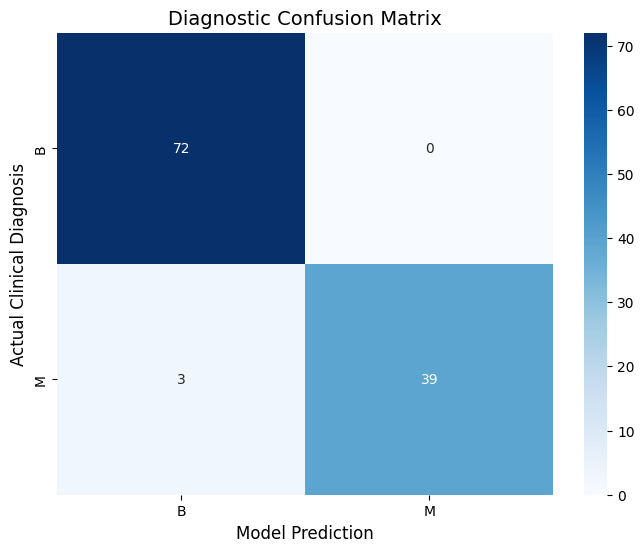

In [34]:
# Visual Confusion Matrix (The 'Golden Standard' for Stakeholders)
cm = confusion_matrix(y_test, tuned_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('Diagnostic Confusion Matrix', fontsize=14)
plt.xlabel('Model Prediction', fontsize=12)
plt.ylabel('Actual Clinical Diagnosis', fontsize=12)
plt.show()

In [35]:
# Quick summary logic
missed_cancers = cm[1, 0] if labels[1] == 'M' else cm[0, 1]
print(f"EXECUTIVE SUMMARY: The model correctly identified {accuracy_score(y_test, tuned_pred):.1%} of cases.")
print(f"CRITICAL ALERT: There were {missed_cancers} missed malignant cases in this batch.")

EXECUTIVE SUMMARY: The model correctly identified 97.4% of cases.
CRITICAL ALERT: There were 3 missed malignant cases in this batch.


### 2.3 Feature Importance  
Now we're going to find out the best features for predicting diagnosis.

In [38]:
def plot_feature_importance(rf_model, xgb_model, feature_names):
    # Extract Importance
    rf_importance = rf_model.feature_importances_
    xgb_importance = xgb_model.feature_importances_
    
    # Create a DataFrame for easy plotting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Random Forest': rf_importance,
        'XGBoost': xgb_importance
    })

    # Sort by Random Forest importance for a cleaner look
    importance_df = importance_df.sort_values(by='Random Forest', ascending=False)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

    # Random Forest Plot
    sns.barplot(x='Random Forest', y='Feature', data=importance_df, ax=axes[0])
    axes[0].set_title('Tuned Random Forest Importance', fontsize=14)
    axes[0].set_xlabel('Importance Score')

    # XGBoost Plot
    sns.barplot(x='XGBoost', y='Feature', data=importance_df, ax=axes[1])
    axes[1].set_title('Tuned XGBoost Importance', fontsize=14)
    axes[1].set_xlabel('Importance Score')

    plt.tight_layout()
    plt.show()

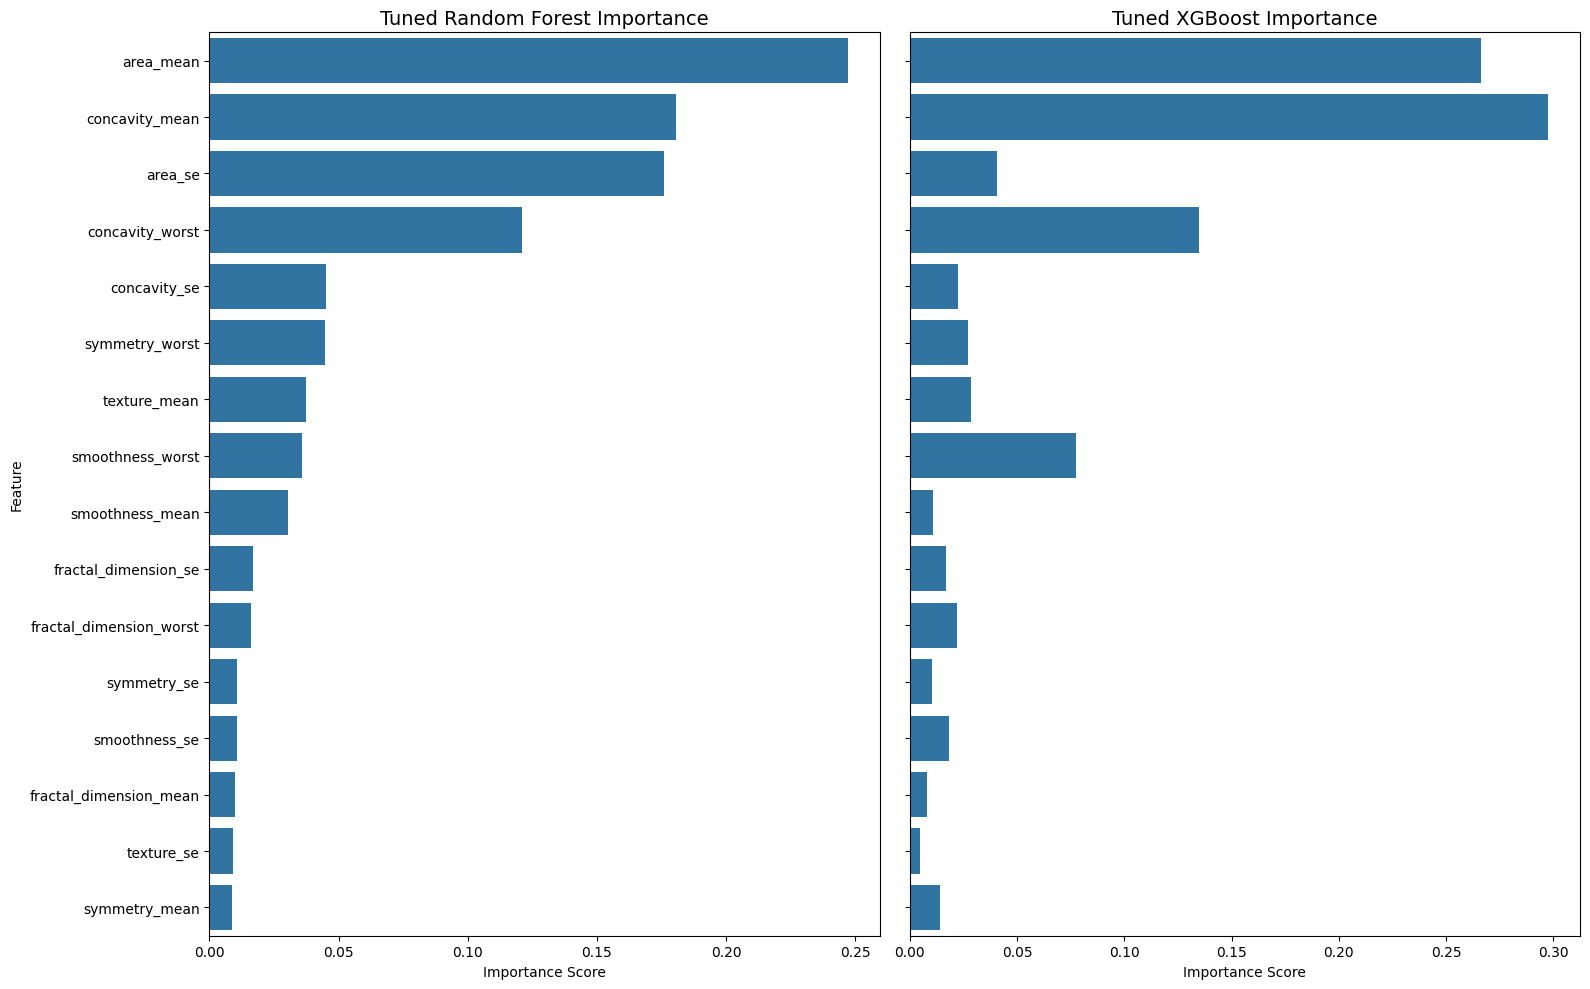

In [39]:
plot_feature_importance(best_rf, best_xgb, breast_cancer_features_simplified.columns)

# Save the model
Now we are going to save the model before deploying it to the cloud.

In [41]:
import pickle

# It is best practice to save the entire pipeline 
# so the cloud server doesn't have to manually scale the data.
deployment_package = {
    "model": stacked_tuned, # This is our fitted StackingClassifier
    "labels": le.classes_   # ['B', 'M']
}

with open('cancer_model_v1.pkl', 'wb') as f:
    pickle.dump(deployment_package, f)

In [42]:
print("✅ Model saved successfully for deployment!")

✅ Model saved successfully for deployment!
